# 0.0 IMPORTS

In [42]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML

## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False) #low_memory argumento que avisa para o computador                                                                 ler o arquivo todo de uma vez, se for true, vai                                                                   considerar q o pc tem pouca memória e ler pedaço                                                                 por pedaço 
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

#merge 

df_raw = pd.merge (df_sales_raw, df_store_raw, how='left', on='Store') #how = forma que você que seja concatenado                                                                        os datasets
                                                                       #on = coluna que existe em comum nos                                                                              datasets e seram referencias na                                                                                  concatenação 

# 1.0 DESCRICAO DOS DADOS

In [3]:
df1 = df_raw.copy() #para evitar caso realize mudanças no dataset para não precisar rodar tudo de novo 

In [4]:
df1.columns 

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename Columns

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday',             'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth',                                     'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x) # função que realizar o metodo para descrever dados

cols_new = list(map(snakecase, cols_old)) #função para aplicar uma função em todos os dados da lista mencionada

#rename 
df1.columns = cols_new #renomeando a coluna do dataset com as modificações 

## 1.2 Data Dimensions

In [6]:
print(f'Number of Rows: {df1.shape[0]}') #determinação das estruturas do tamanho do dataset
print(f'Number of Cols: {df1.shape[1]}')

Number of Rows: 1017209
Number of Cols: 18


## 1.3 Data Types

In [12]:
df1.dtypes #determinação dos tipos das variaveis 

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [8]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.4 Check NA

In [13]:
df1.isna().sum() #função para ver os dados faltantes aplicados em conjuntos c a função para somar a quantidade de                   dados faltantes
                 #três formas de tratar o NA: 
                 #1 - Exclui o NA = MUito mais rapido porem perde muita informação 
                 #2 - Algoritimos de machine learning que façam a substituição baseada no comportamento da coluna
                 #3 - Pensando no negócio (entendo a variavel)

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.5 Fillout NA

In [10]:
df1['competition_distance'].max()

75860.0

In [11]:
#competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)
# jogamos um valor acima da maior distancia pois, não temos uma loja competitiva ou está muito longe


#competition_open_since_month 
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
#Consideramos que o mes da compra é o mesmo mes para os resultados NA nesta coluna, caso contrario, retorna o mes que já é existente


#competition_open_since_year 
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
#Consideramos que o ano da compra é o mesmo ano para os resultados NA nesta coluna, caso contrario, retorna o ano que já é existente

#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)
#Consideramos que a semana da compra é o mesmo semana para os resultados NA nesta coluna, caso contrario, retorna a semana que já é existente

#promo2_since_year 
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)
#Consideramos que o ano da compra é o mesmo ano para os resultados NA nesta coluna, caso contrario, retorna o ano que já é existente

#promo_interval 
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7:'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
# dicionario criado para comparar com a coluna date, para retornar o mes, relatado na data da compra. 

df1['promo_interval'].fillna(0, inplace = True)
#transformou tudo que é NA em zero 

df1['month_map'] = df1['date'].dt.month.map(month_map) 
#coluna que retornar os meses descritos no dicionario baseado na data da compra

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis =1)
#coluna criada para nos retornar com 1 se a data de compra foi realizada dentro do periodo de promoção e 0 para a que não foi comprada no periodo de promoção. 

In [19]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change types

In [16]:
df1.dtypes #conferindo novamente nossos dados 

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [15]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int) #Função que determina a coluna como inteira
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7 Descriptive Statistical 

In [17]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64']) #função para selecionar as colunas pelo tipe delas
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]']) 

In [18]:
num_attributes.sample(2) #função que seleciona linhas aleatórias

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
859527,648,3,4925,517,1,0,0,2130.0,12,2008,0,21,2013,0
907979,40,1,5746,705,1,1,0,180.0,4,2013,1,45,2009,0


In [19]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
80786,0,a,c,"Jan,Apr,Jul,Oct",May
356964,0,d,c,"Jan,Apr,Jul,Oct",Aug


## 1.7.1 Numerical Attributes

In [23]:
# Central Tendency - Mean, median
ct1 = pd.DataFrame (num_attributes.apply(np.mean)).T #apply função para aplicar em todas as colunas uma operação
ct2 = pd.DataFrame (num_attributes.apply(np.median)).T


# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame (num_attributes.apply(np.std)).T
d2 = pd.DataFrame (num_attributes.apply(min)).T
d3 = pd.DataFrame (num_attributes.apply(max)).T
d4 = pd.DataFrame (num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame (num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame (num_attributes.apply(lambda x: x.kurtosis())).T
                   
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range', 'mean','median','std','skew','kurtosis']

In [24]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/home/diego/.pyenv/versions/3.10.1/envs/DsemProducao/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

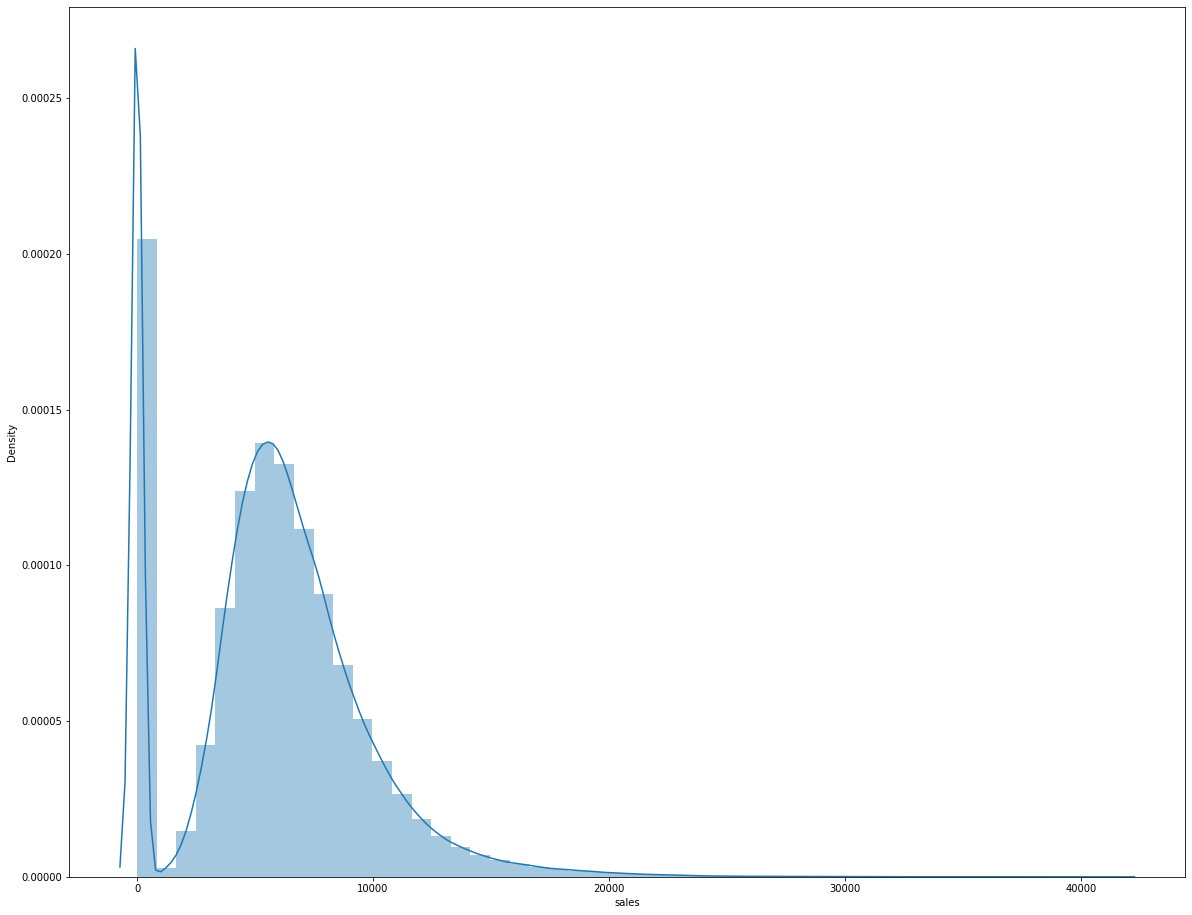

In [47]:
plt.figure(figsize=(20, 16))
sns.distplot (df1['sales'])

## 1.7.2 Categorical Attributes

In [32]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

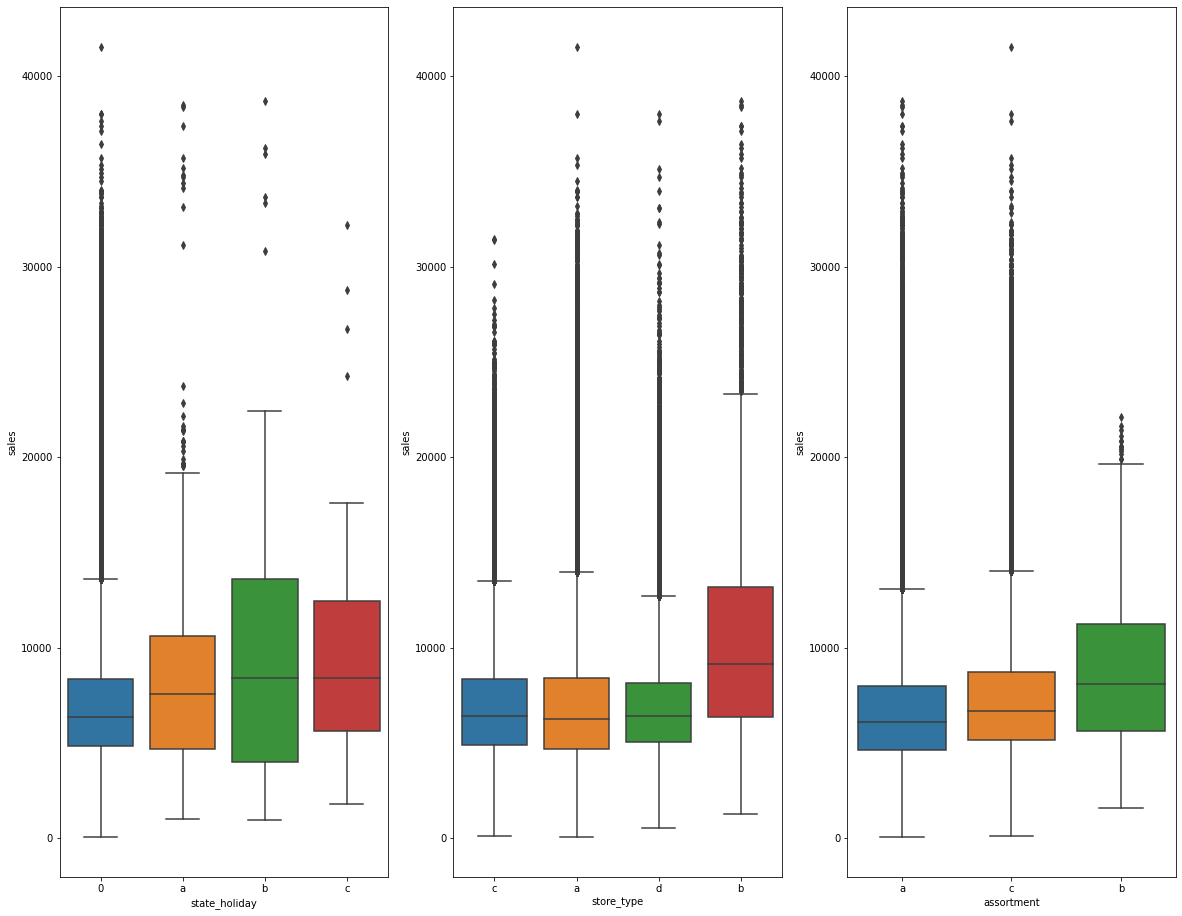

In [46]:
aux1 = df1[(df1['state_holiday'] != 0) & (df1['sales'] > 0)]

plt.figure(figsize=(20, 16))

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux1)